## Import libraries and init

In [14]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict
from functools import reduce
import operator

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

## Load ntuples from analyzer

In [15]:
background = ['WWTo2L2Nu']
cuts = np.arange(0,6)
branchPath = 'SREffi_dsa'
baseDir = '~/nobackup/signal_region/2018/backgrounds/'
#fileName = lambda Mchi, dMchi, ctau: baseDir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

#tres input
#fileName = 'root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDM/Ntuples/2018/backgrounds/WWJJToLNuLNu/WWJJToLNuLNu_EWK_13TeV-madgraph-pythia8/WWJJToLNuLNu/190309_053107/0000/output_1.root'
fileName = baseDir+'WWTo2L2Nu/output_1-5.root'
numParams = len(background)
countMasses = 0

dfs = OrderedDict({})
genInfo = OrderedDict({})
numEvents = OrderedDict({})
for back in background:
    dfs[back] = OrderedDict({})
    numEvents[back] = OrderedDict({})
    genInfo[back] = OrderedDict({})
    genInfo[back] = uproot.open(fileName)['GEN/gen'].pandas.df()
    dfs[back] = uproot.open(fileName)[branchPath + f'/cut0'].pandas.df()
    countMasses += 1
    print(f'{countMasses} of {numParams}: ' + fileName)
    

1 of 1: ~/nobackup/signal_region/2018/backgrounds/WWTo2L2Nu/output_1-5.root


## Inspect data

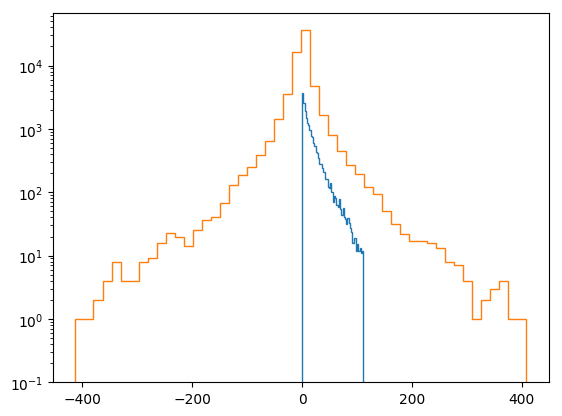

In [16]:
plt.hist(dfs[background[0]]['recoVxy'].dropna(), bins=50, log=True, histtype='step', density=False);
plt.hist(dfs[background[0]]['recoDxy'].dropna(), bins=50, log=True, histtype='step', density=False);

## Inclusive cuts

In [17]:
back = background[0]
cutFlowDict = OrderedDict()
for back in background:
    cutFlowDict[back] = []
    cutsCrit = [dfs[back][f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
    for cut in np.arange(0,6):
        cutsToApply = reduce(operator.and_, cutsCrit[0:cut+1])
        cutFlowDict[back].append(len(dfs[back][cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,WWTo2L2Nu
0,5629685
1,207627
2,33391
3,5845
4,309
5,105


## Exclusive cuts

In [18]:
cutFlowDict = OrderedDict()
for back in background:
    cutFlowDict[back] = []
    cutsCrit = [ dfs[back][f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
    for cut in np.arange(0,6):
        cutsToApply = cutsCrit[cut]
        cutFlowDict[back].append(len(dfs[back][cutsToApply]))
        
cutFlowDf = pd.DataFrame.from_dict(cutFlowDict)
cutFlowDf

,WWTo2L2Nu
0,5629685
1,207627
2,118828
3,1306342
4,253486
5,157425


(array([   18.,    73.,   102.,   171.,   209.,   263.,   286.,   358.,
          409.,   441.,   507.,   550.,   673.,   741.,   746.,   770.,
          802.,   918.,   909.,   979.,  1023.,   969.,   987.,  1045.,
          999.,  1025.,  1058.,   993.,  1007.,   981.,   934.,   920.,
          900.,   812.,   862.,   725.,   788.,   705.,   708.,   617.,
          596.,   585.,   553.,   509.,   490.,   437.,   432.,   434.,
          406.,   370.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ,  13.2,  14.4,  15.6,  16.8,  18. ,  19.2,  20.4,
         21.6,  22.8,  24. ,  25.2,  26.4,  27.6,  28.8,  30. ,  31.2,
         32.4,  33.6,  34.8,  36. ,  37.2,  38.4,  39.6,  40.8,  42. ,
         43.2,  44.4,  45.6,  46.8,  48. ,  49.2,  50.4,  51.6,  52.8,
         54. ,  55.2,  56.4,  57.6,  58.8,  60. ]),
 <a list of 1 Patch objects>)

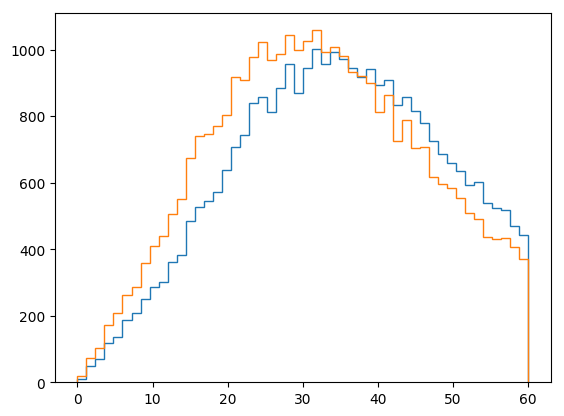

In [19]:
plt.hist(genInfo[background[0]].query('pid==13|pid==-13')['pt'].groupby(level=0).max(),bins=50,range=(0,60),histtype='step')
plt.hist(genInfo[background[0]].query('pid==13|pid==-13')['pt'].groupby(level=0).min(),bins=50,range=(0,60),histtype='step')

In [20]:
genInfo[background[0]].query('pid==13|pid==-13')[['pt','eta']]

pt       eta
entry subentry                      
2     4          37.848003  3.850603
6     5          27.036366  1.769359
10    4          46.254471  1.264866
16    5          11.262203  2.982728
18    5          30.780807  4.092708
21    4          51.891670  1.576324
      5          66.071510  0.779542
22    4          26.776142 -0.752701
      5           4.741927  2.744579
23    5          29.580214  2.058624
28    4          26.108618 -2.520487
29    4          31.941139  3.637410
      5          18.479868  2.426592
31    5          26.043800  0.382252
32    5          22.777195  0.207157
36    5          27.158884 -0.672802
37    4          21.968533 -3.571131
38    4          42.537258 -1.611456
39    5          52.041656 -1.631747
40    4          69.379616 -2.541196
41    4          35.459118 -1.913728
42    5          28.816572 -1.433538
44    5          83.421814 -1.251768
45    4          13.346972  2.181069
      5          22.164330  1.837352
48    4          44.418434  0.460712
50    4          43.289658 -1.326422
51    5          29.724977  2.553601
52    4          41.869350 -1.779899
53    4          41.455513 -1.274169
...                    ...       ...
71754 4          81.789154  2.511581
71756 4          25.482063  4.341616
71760 5          47.680935 -0.324044
71761 4          30.713625 -2.904916
71762 4          73.455612 -0.787997
71763 4          56.480198  3.514266
71765 4          33.084457 -0.484128
71767 4          11.996681 -1.099593
71768 4          35.463058  1.307021
      5          75.715233 -0.217941
71769 5          17.998135 -0.576208
71771 5          19.065350 -2.725976
71773 4          37.823578 -1.561243
71776 4          12.536593 -1.605351
      5          50.780975 -2.910543
71777 4          58.280369 -3.072375
71778 4         148.047440  0.615274
71782 5          27.191494  1.730474
71784 4           9.964464  2.233611
      5          31.439816  1.688154
71787 4          21.845474  1.781734
71790 4          41.447689 -3.383083
      5          46.588772 -2.275404
71791 4          58.743652  2.075934
71796 5          44.397194 -0.361216
71797 5          10.008889 -2.039890
71798 4          56.504940  0.408092
71801 4          41.863369 -1.386165
      5          33.650066 -3.899497
71805 5          93.525490 -1.937464

[47788 rows x 2 columns]

## Plot everything together

To plot individual plots separately, copy relevant block of code and replace "axes[i,j]" with "plt", and take note that some of the functions change name, e.g. axes[i,j].set_xlabel() --> plt.xlabel() and axes[i,j].set_ylim() --> plt.ylim().

The other option is to copy the block and add "fig, ax = plt.subplots(1,1)" at the top, and then do the replacement axes[i,j] --> ax elsewhere.

### Some plotting helper functions

In [21]:
insets = True
build='stepfilled'
iheight="65%"
iwidth="45%"

def plot_inset(data, axis, kwargs={}):
    if 'bins' not in kwargs: kwargs['bins'] = 10
    if 'histtype' not in kwargs: kwargs['histtype'] = build
    if insets:
        axins = inset_axes(axis, width=iwidth, height=iheight)
        for (cut,datum) in enumerate(data):
            ret = axins.hist(datum, log=True, **kwargs)
            if cut == 1:
                #axins.set_ylim(0,1.1*max(ret[0]))
                axins.set_ylim(0.1,1.1*max(ret[0]))
        return axins

def plot_full(data, axis, kwargs={}, labels = []):
    if 'bins' not in kwargs: kwargs['bins'] = 50
    if 'histtype' not in kwargs: kwargs['histtype'] = build 
    for (cut,datum) in enumerate(data):
        if len(labels) > 0:
            axis.hist(datum, label=labels[cut],log=True, **kwargs)
        else:
            axis.hist(datum, **kwargs)

### Plot MET and jet variables, and cut-flow histo

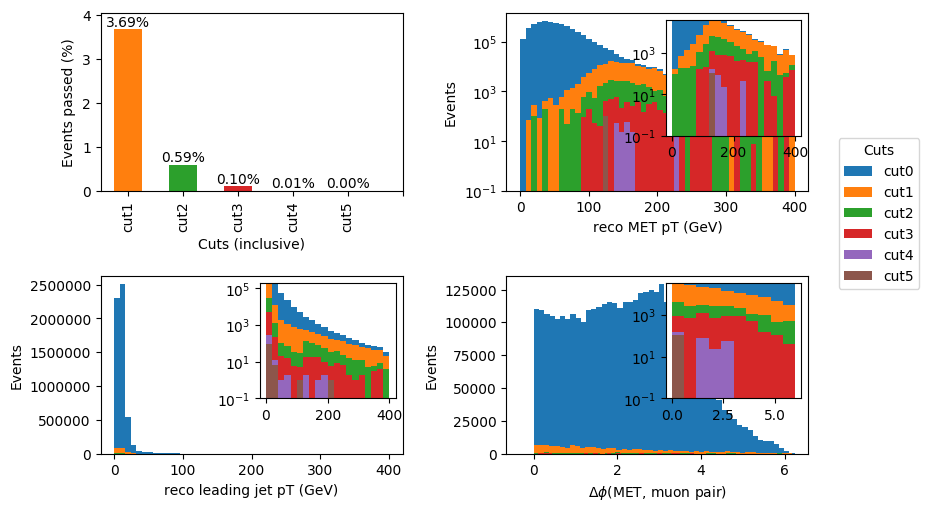

In [22]:
back = background[0]

### Make subplot axes
fig, axes = plt.subplots(2,2, figsize=(8,5))
for row in axes:
    for col in row:
        col.set_ylabel('Events')
# fig.suptitle("Signal region efficiency for m1 = 50 GeV, m2 = 55 GeV")
# fig.subplots_adjust(top=0.92)
plt.tight_layout(h_pad=4.0, w_pad=3.0)
# axes[1, 1].axis('off')

### Histogram cut-flow of passing events 
counts = []
cutsCrit = [ dfs[back][f'cutsVec[{cut}]']==1 for cut in np.arange(0,6) ]
cuttype = [reduce(operator.and_, cutsCrit[0:cut+1]) for cut in np.arange(0,6)]
for cut in np.arange(0,6):

    count = len(dfs[back][cuttype[cut]])
    norm = len(dfs[back][dfs[back][f'cutsVec[0]']==1])
    counts.append(100*count/norm)
axlabels = [f'cut{cut}' for cut in cuts[1:]]
countseries = pd.Series.from_array(counts[1:])

countseries.plot(ax=axes[0,0],kind='bar',color=['C1','C2','C3','C4','C5'])
axes[0,0].set_xlabel('Cuts (inclusive)')
axes[0,0].set_ylabel('Events passed (%)')
axes[0,0].set_xticklabels(axlabels)
axes[0,0].set_xticks(np.arange(0,len(cuts)))
axes[0,0].set_ylim(0, 1.1*max(counts[1:]))

rects = axes[0,0].patches

labels = ["%.2f%%" % counts[i] for i in np.arange(1,len(rects)+1)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes[0,0].text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')
    
### reco MET pT
axes[0,1].set_xlabel('reco MET pT (GeV)')
data = [dfs[back][cuttype[cut]]['recoPFMetPt'].dropna() for cut in cuts]
labels = [f'cut{cut}' for cut in cuts]
plot_full(data, axes[0,1], dict({'range':(0,400)}), labels=labels)
plot_inset(data, axes[0,1], dict({'range':(0,400),'bins':20}))

### reco leading jet pT
axes[1,0].set_xlabel('reco leading jet pT (GeV)')
data = [dfs[back][cuttype[cut]]['recoPFJetPt'].dropna() for cut in cuts]
plot_full(data, axes[1,0], dict({'range':(0,400)}))
plot_inset(data, axes[1,0], dict({'range':(0,400), 'bins':20}))

### DeltaPhi b/w MET and muon pair
axes[1,1].set_xlabel(r'$\Delta\phi$(MET, muon pair)')
data = [abs((dfs[back][cuttype[cut]]['recoPFMetPhi'].dropna() - 
            dfs[back][cuttype[cut]]['recoPhi'].groupby(level=0).mean()).dropna()) for cut in cuts]
plot_full(data, axes[1,1])
plot_inset(data, axes[1,1], dict({'range':(0,6)}))
    
### Make and place legend w.r.t. axis[0,1] (upper right)
# axes[0,1].legend(loc=(0.3,-1.5), title='Cuts')
axes[0,1].legend(loc=(1.1,-0.55), title='Cuts')

### Plot muon-related variables

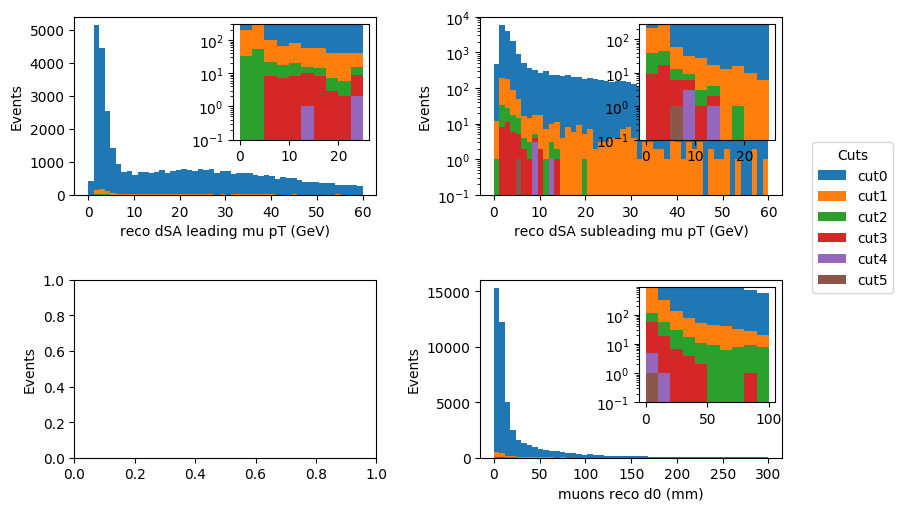

In [23]:
back = background[0]

fig, axes = plt.subplots(2,2, figsize=(8,5))
for row in axes:
    for col in row:
        col.set_ylabel('Events')
plt.tight_layout(h_pad=4.0, w_pad=3.0)

### reco dSA leading muon pT
axes[0,0].set_xlabel('reco dSA leading mu pT (GeV)')
data = [dfs[back][cuttype[cut]].query('subentry==0')['recoPt'].dropna() for cut in cuts]
plot_full(data, axes[0,0], dict({'range':(0,60)}))
plot_inset(data, axes[0,0], dict({'bins':10,'range':(0,25)}))

### reco dSA subleading muon pT
axes[0,1].set_xlabel('reco dSA subleading mu pT (GeV)')
data = [dfs[back][cuttype[cut]].query('subentry==1')['recoPt'].dropna() for cut in cuts]
labels = [f'cut{cut}' for cut in cuts]
plot_full(data, axes[0,1], dict({'range':(0,60)}), labels=labels)
plot_inset(data, axes[0,1], dict({'bins':10,'range':(0,25)}))

#### muon deltaR
#axes[1,0].set_xlabel('muon pair dR')
##data = [dfs[mchi][10][cut]['deltaR'].dropna() for cut in cuts]
#data = [dfs[mchi][10][0][cuttype[cut]]['deltaR'].dropna() for cut in cuts]
#plot_full(data, axes[1,0], dict({'range':(0,6)}))
#plot_inset(data, axes[1,0], dict({'bins':10,'range':(0,0.25)}))

### muon d0 (leading)
axes[1,1].set_xlabel('muons reco d0 (mm)')
data = [np.sqrt(dfs[back][cuttype[cut]].query('subentry==0')['recoDz'].dropna()**2 + 
                dfs[back][cuttype[cut]].query('subentry==0')['recoDxy'].dropna()**2) for cut in cuts]
plot_full(data, axes[1,1], dict({'range':(0,300)}))
# axes[1,1].set_ylim(0,1000)
plot_inset(data, axes[1,1], dict({'range':(0,100)}))

### Make and place legend w.r.t. axis[0,1] (upper right)
axes[0,1].legend(loc=(1.1,-0.55), title='Cuts')


## Cut-flow table (old, keep just for comparison)

In [13]:
cutflow = OrderedDict({})
for m in background:
    counts = []
    for cut in cuts:
        count = len(dfs[m][cut]['recoPFMetPt'])
        norm = len(dfs[m][0]['recoPFMetPt'])
        counts.append(count)
        countseries = pd.Series.from_array(counts[1:])
        cutflow[m]=counts

cutflowdf = pd.DataFrame.from_dict(cutflow)
cutflowdf

KeyError: 0